In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [2]:
def exp_win_prob(dr):
    return 1 / (10 ** (-dr / 400) + 1)

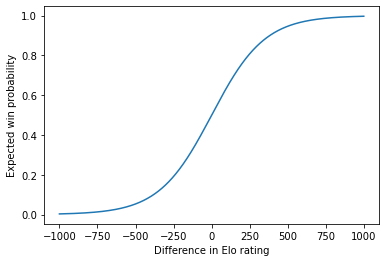

In [3]:
x = np.arange(-1000, 1000)

fig, ax = plt.subplots(facecolor = 'white', figsize=(6,4))
ax.plot(x, exp_win_prob(x))
ax.set_xlabel('Difference in Elo rating')
ax.set_ylabel('Expected win probability')
fig.savefig('elo_expected_win_prob', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
exp_win_prob(2107 - 1600)

0.9487547111474991

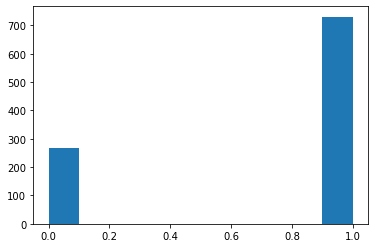

In [6]:
a = ss.bernoulli.rvs(0.75, size=1000)

plt.hist(a)
plt.show()

In [36]:
def play_soccer_match(team_a, team_b, team_a_elo, team_b_elo):
    dr = team_a_elo - team_b_elo
    team_a_win_prob = 1 / (10 ** (-dr / 400) + 1)
    
    n = np.random.rand()
    
    print(f"{team_a} win probability: {round(team_a_win_prob, 3)}")
    
    if n >= team_a_win_prob:
        print(f"{team_a} beats {team_b}!!!")
        winner = team_a
    else:
        print(f"{team_b} beats {team_a}!!!")
        winner = team_b
        
    return winner
            
play_soccer_match("Belgium", "France", 1600, 1500)

Belgium win probability: 0.64
France beats Belgium!!!


'France'

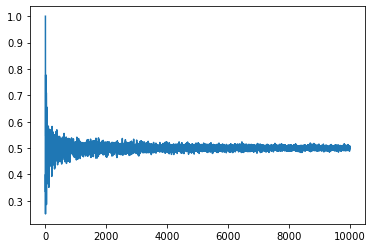

In [24]:
n = np.arange(1, 10001)

wins = [np.mean(ss.bernoulli.rvs(0.5, size=i)) for i in n]
plt.plot(n, wins)
plt.show()

In [39]:
1 * 1/51 + 1/51 * 51/52

0.038838612368024134

In [40]:
13 / 52 * 1 / 13 + 39 / 52 * 1 / 39

0.038461538461538464

In [43]:
-(1/52 * np.log2(1/52) + 51/52 * np.log2(51/52))

0.1370994788998177